мы на датасете mnist пробовали самую простую сеть. я попробовала на этом датасете сверточную. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline

In [2]:
np.random.seed(5)

In [3]:
train = pd.read_csv('train_mnist.csv')
test = pd.read_csv('test_mnist.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

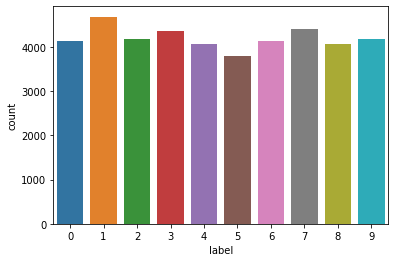

In [4]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train = X_train / 255.0
test = test / 255.0

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [9]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=5)

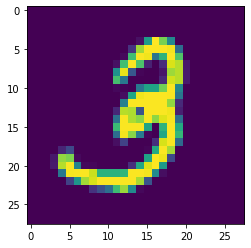

In [12]:
g = plt.imshow(X_train[0][:,:,0])

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [14]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [15]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [57]:
epochs = 10
batch_size = 86

In [58]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [59]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              ) #, callbacks=[learning_rate_reduction]

Epoch 1/10
439/439 - 174s - loss: 0.0606 - accuracy: 0.9838 - val_loss: 0.0350 - val_accuracy: 0.9924
Epoch 2/10
439/439 - 164s - loss: 0.0637 - accuracy: 0.9833 - val_loss: 0.0929 - val_accuracy: 0.9843
Epoch 3/10
439/439 - 159s - loss: 0.0626 - accuracy: 0.9836 - val_loss: 0.0451 - val_accuracy: 0.9898
Epoch 4/10
439/439 - 153s - loss: 0.0664 - accuracy: 0.9845 - val_loss: 0.0314 - val_accuracy: 0.9919
Epoch 5/10
439/439 - 157s - loss: 0.0678 - accuracy: 0.9822 - val_loss: 0.0613 - val_accuracy: 0.9910
Epoch 6/10
439/439 - 153s - loss: 0.0645 - accuracy: 0.9836 - val_loss: 0.0614 - val_accuracy: 0.9874
Epoch 7/10
439/439 - 158s - loss: 0.0663 - accuracy: 0.9830 - val_loss: 0.0467 - val_accuracy: 0.9905
Epoch 8/10
439/439 - 160s - loss: 0.0705 - accuracy: 0.9821 - val_loss: 0.0508 - val_accuracy: 0.9917
Epoch 9/10
439/439 - 162s - loss: 0.0688 - accuracy: 0.9827 - val_loss: 0.0391 - val_accuracy: 0.9919
Epoch 10/10
439/439 - 155s - loss: 0.0717 - accuracy: 0.9818 - val_loss: 0.0526 - 

In [55]:
history.history

{'loss': [0.05646334961056709,
  0.0556289367377758,
  0.05684417113661766,
  0.06079144403338432,
  0.05965050682425499],
 'accuracy': [0.9848332405090332,
  0.984435498714447,
  0.984117329120636,
  0.9842498898506165,
  0.9842498898506165],
 'val_loss': [0.04580344259738922,
  0.03799879923462868,
  0.028242966160178185,
  0.03770400583744049,
  0.04561040177941322],
 'val_accuracy': [0.9904761910438538,
  0.991428554058075,
  0.9938095211982727,
  0.9907143115997314,
  0.9907143115997314]}

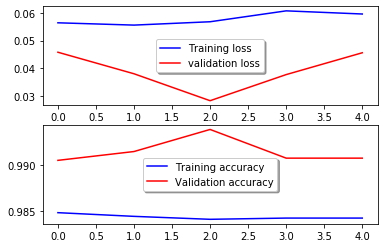

In [56]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [48]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 

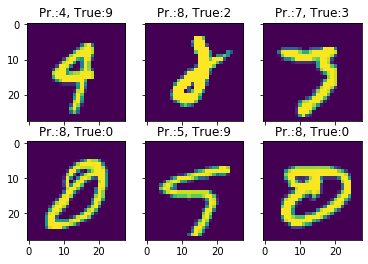

In [49]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Pr.:{}, True:{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-6:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [50]:
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [51]:
results.values[:25]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7], dtype=int64)